In [1]:
#Add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from diffusers import StableDiffusionPipeline
import torch

/home/ricardo/miniconda3/envs/dreambooth/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
output_dir="/home/ricardo/master_thesis/extra_materials/Diffusion_models_HF_course/results/cansu_specialvaetrain"
pipe = StableDiffusionPipeline.from_pretrained(output_dir, safety_checker=None, torch_dtype=torch.float16).to("cuda")
generator = torch.Generator(device='cuda')

/home/ricardo/miniconda3/envs/dreambooth/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


100%|██████████| 50/50 [00:15<00:00,  3.20it/s]


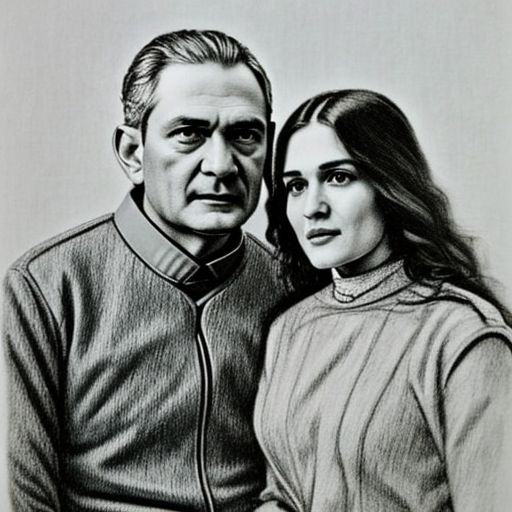

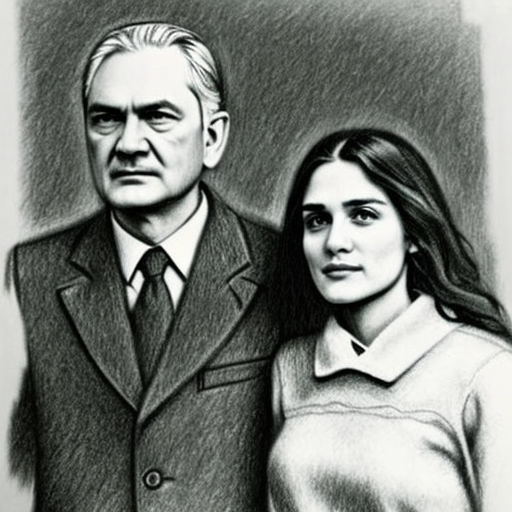

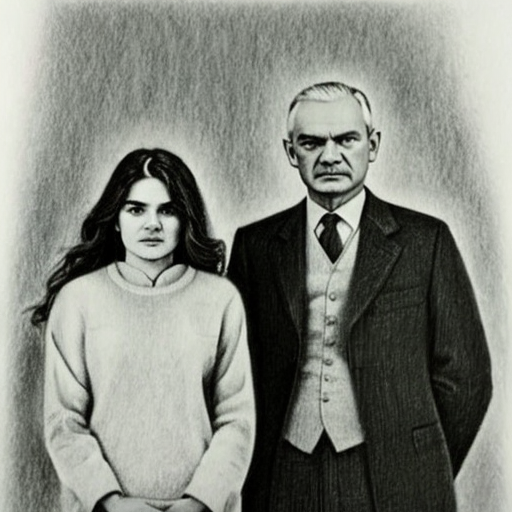

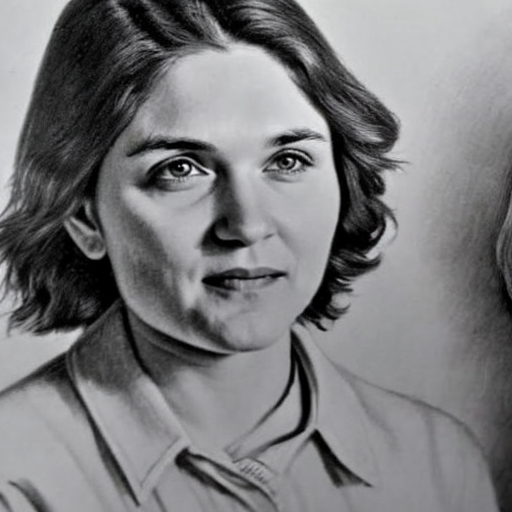

In [43]:
seed = 52349
generator.manual_seed(seed)

prompt = "pencil drawing of ukj person, cute, beautiful, lovely, next to Mustafa Kemal Ataturk"
negative_prompt = "no face details"
num_samples = 4
guidance_scale = 7.5
num_inference_steps = 50
size = 512
with torch.autocast("cuda"), torch.inference_mode():
    image = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        height=size,
        width=size,
        generator=generator,
    ).images

for img in image:
    display(img)